# Leak

## Set Up

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import re
import json
import pickle
import pandas as pd
from pathlib import Path

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import sys
# Add the workspace root to sys.path so 'scripts' can be imported
sys.path.append(str(Path.cwd().parents[3]))

from scripts.feature_extractions.byte_freq import get_byte_freq_from_files


In [3]:
PATH = Path.cwd().parents[3]
MODEL_PATH = os.path.join(PATH, 'models/baseline')
DATA_PATH = os.path.join(PATH, 'data')
EX_PATH = os.path.join(DATA_PATH, 'external/crpwarner/large')
HEX_PATH = os.path.join(EX_PATH, 'hex')

## Load and Prepare Data

In [4]:
df = pd.read_excel(os.path.join(EX_PATH, 'sample/leak.xlsx'))
df['Address'] = df['Address'].str.lower()
df = df.set_index('Address')
df.head()

,TP?
Address,
0x0290ea3c728981725689187763f6c63a68e192b8,Yes
0x054ad3cd4a66f14bf5c0de2548a53be66995a4f6,Yes
0x0566c17dc2a9efcaa2f63e04cf06a69e8fc77f60,No
0x10c8324b20b7266c445944f043f53f6a77ea0bd4,Yes
0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,Yes


In [5]:
df.isna().sum()

TP?    0
dtype: int64

In [6]:
files = []
y = []

for path in list(Path(HEX_PATH).glob('*.hex')):
    address = path.stem.lower()
    if address in df.index:
        files.append(path)
        tp_value = df.loc[address, 'TP?']
        if isinstance(tp_value, pd.Series):
            tp_value = tp_value.iloc[0]
        y.append(1 if tp_value == 'Yes' else 0)

X = get_byte_freq_from_files(files)

In [7]:
X

,60,40,52,04,36,10,61,01,c2,57,...,ab,89,21,a6,b1,ba,9a,4a,e7,d5
address,,,,,,,,,,,,,,,,,,,,,
0xf6962cfe3b9618374097d51bc6691efb3974d06f,526,77,109,78,3,27,299,213,6.0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x666c549f5a01167f1aa19bb68be552441f520895,391,43,107,37,6,12,126,134,3.0,76,...,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb,463,37,88,67,2,20,159,194,2.0,79,...,1.0,3.0,0.0,0.0,1.0,6.0,2.0,1.0,0.0,0.0
0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,636,98,79,119,4,19,404,240,6.0,182,...,5.0,5.0,8.0,4.0,3.0,5.0,7.0,2.0,3.0,6.0
0xa99f34b4672ff3a9837fd93dea375ccfbb83c89a,648,57,153,44,3,41,237,175,3.0,116,...,3.0,4.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x8a52499ff8c65cedd4d7ccc283a0dab6df285fe2,706,79,170,65,9,27,257,276,1.0,106,...,1.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,5.0
0x6b9ee9e79bb893d394da79e2ea51685d1855318e,577,74,143,56,11,26,224,233,4.0,97,...,2.0,11.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,1.0
0xdf482745749ad7057f4ebe246975ff2f2ddeef78,402,46,92,43,2,10,140,151,5.0,72,...,1.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0


In [8]:
y[:5]

[1, 1, 1, 1, 0]

In [9]:
with open(os.path.join(DATA_PATH, 'processed/byte_freq/features.json'), 'r', encoding='utf-8') as f:
    train_cols = json.load(f)

In [10]:
X = X.reindex(columns=train_cols, fill_value=0).reset_index(drop=True)

## Load Model and Evaluate

In [11]:
model_paths = list(Path(MODEL_PATH).glob('leak-*.pkl'))

In [12]:
def get_best_model_path(paths):
    best_f1_score = -1.0
    best_path = None

    for path in paths:
        # Extract the F1 score using a regular expression
        match = re.search(r'f1-(\d+\.\d+)\.(pkl|json|keras)$', path.name)
        if match:
            try:
                f1_score = float(match.group(1))
                if f1_score > best_f1_score:
                    best_f1_score = f1_score
                    best_path = path
            except ValueError:
                # Handle cases where the extracted string might not be a valid float
                print(f"Warning: Could not parse F1 score from filename: {path.name}")
        else:
            print(f"Warning: F1 score pattern not found in filename: {path.name}")

    return best_path

In [13]:
best_model_path = get_best_model_path(model_paths)

if best_model_path:
    model = pickle.load(open(best_model_path, 'rb'))

In [14]:
y_pred = model.predict(X)

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.16      1.00      0.27        13
           1       1.00      0.05      0.10        74

    accuracy                           0.20        87
   macro avg       0.58      0.53      0.19        87
weighted avg       0.87      0.20      0.13        87



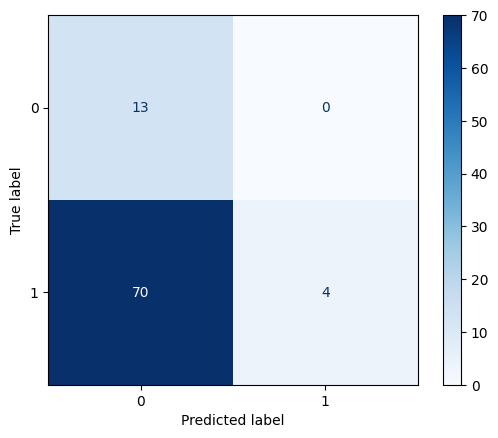

In [16]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()